In [1]:
#import modules
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
#read csv into a dataframe
numts=pd.read_csv(r'Z:\balint\numt/3numt_array.csv')
numts=numts[numts['mt_start']<17245]#filter out the abnormal numts coming from the dmtDNA alignment
numts=numts.sort_values(by='mt_start')

In [3]:
#try to get as different colors as possible
colors=pd.Series(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
                  '#bcf60c','#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
                  '#808000', '#ffd8b1','#000075', '#00FF7F','#000000'], index=np.arange(1,22,1))

In [4]:
#function for visualizing numts as horizontal barcharts
def horizontal_numts(row):
    global numt_tracker
    try:
        axs.barh(numt_tracker,row['mt_length'],left=row['mt_start'],height=1,
                 color=colors[int(row['g_id'])])
    except:
        axs.barh(numt_tracker,row['mt_length'],left=row['mt_start'],height=0.5,
                 color='grey')
    numt_tracker+=1

In [5]:
#get custom legend colors
custom_lines_color=colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='o',
                                                        markersize=7)).tolist()

In [6]:
#function for drawing brackets to annotate each mitochondrial part
def draw_brace(ax, xspan, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    ymin, ymax = ax.get_ylim()
    yspan = 20
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:resolution//2+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = ymin + (.15*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., ymin+.2*yspan, text, ha='center', va='bottom', fontsize=12.5,rotation=70)

In [7]:
#read in the mitochondrial annotation and add d-loop
mitos=pd.read_csv(r'Z:\balint\numt/mitos_annotation.bed',sep='\t',header=None)
mitos.columns=['MT','START','END','DESCRIPTION','SIG','STRAND']
mitos.loc[len(mitos)]=['MT',15445,17245,'D-loop',0.001,'+']

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


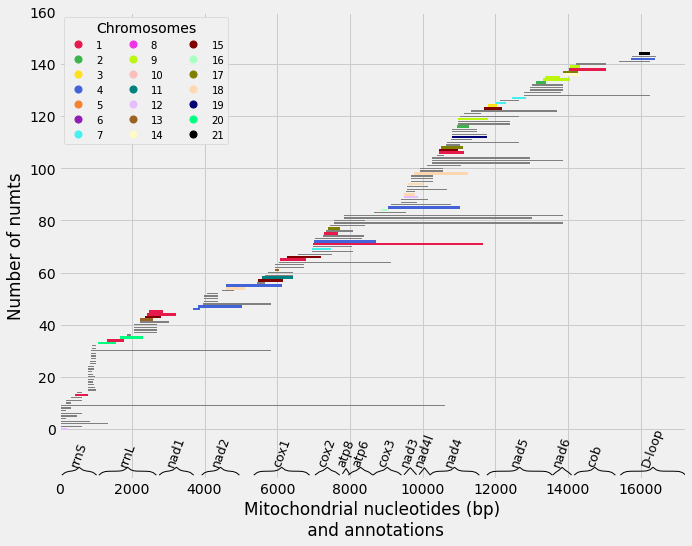

In [11]:
#visualize the numts
plt.style.use('fivethirtyeight')
trial_numts=numts[(numts['mt_start']+numts['mt_length'])<17245]
fig,axs=plt.subplots(1,1,figsize=(10,8))
axs.set_ylim(-19,160)
axs.set_xlim(0,17245)
axs.set_ylabel('Number of numts')
axs.set_xlabel('Mitochondrial nucleotides (bp)\n and annotations')
axs.set_xticklabels([0,2000,4000,6000,8000,10000,12000,14000,16000,17245,''])

numt_tracker=0
trial_numts.apply(horizontal_numts,axis=1)

legend=axs.legend(custom_lines_color,colors.index.values, loc='upper left', title='Chromosomes',
                  fontsize=10,ncol=3)
axs.add_artist(legend)
    
for index, start in enumerate(mitos['START']):
    if (mitos['END'][index]-start)>100:
        draw_brace(axs,(start,mitos['END'][index]),mitos['DESCRIPTION'][index])